# Quantum Gates

In this notebook, we will aim to realise the following steps
- To observe qubits behaivours with basic gate operations
- Visualization with state vectors
- Intuitive understanding with Bloch's sphere

## Hadamard Gate

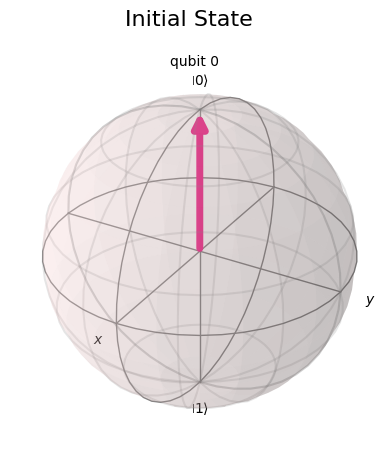

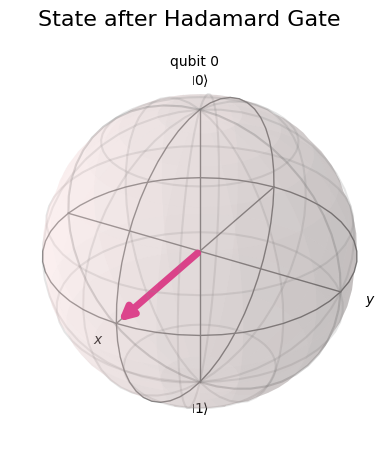

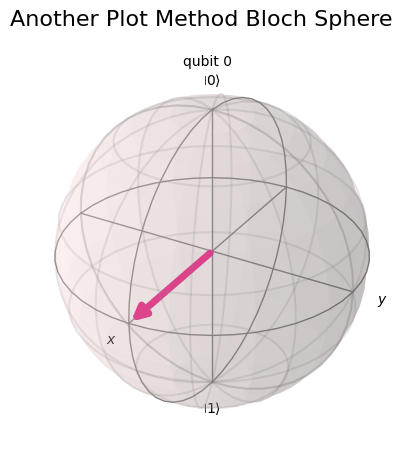

In [58]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
%matplotlib inline
import matplotlib.pyplot as plt

# Create a quantum circuit with 1 qubit
qc = QuantumCircuit(1)
#initial state of the circuit
state_ini = Statevector(qc)
# Apply a Hadamard gate to create a superposition state
qc.h(0)

# Get the statevector of the circuit
state = Statevector(qc)

# Plot the Bloch sphere representation of the state
plot_bloch_multivector(state_ini, title='Initial State')
# Plot the Bloch sphere representation of the state after applying Hadamard gate
plot_bloch_multivector(state, title='State after Hadamard Gate')
# There is an another way to plot the Bloch sphere using the draw method which uses plot_bloch_multivector in the background
bloch_fig = state.draw('bloch',title='Another Plot Method Bloch Sphere')
# Show the plot
plt.show()



The qubit is equal to $|0⟩$ before applying the Hadamard gate. Hadamard makes the qubit state is:
$$ 
|+⟩ = \frac{1}{\sqrt{2}}(|0⟩ + |1⟩)
$$

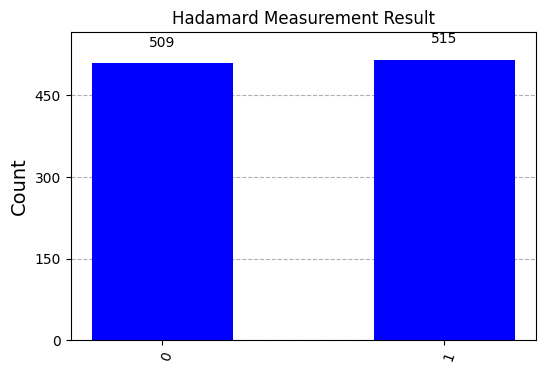

In [59]:
from qiskit_aer import Aer
from qiskit import transpile
from qiskit.visualization import plot_histogram

# Create a quantum circuit with 1 qubit and 1 classical bit
qc = QuantumCircuit(1,1)
# Apply a Hadamard gate to create a superposition state
qc.h(0)
# Measure the qubit and store the result in the classical bit
qc.measure(0,0)

# Select the qasm simulator backend
simulator = Aer.get_backend('qasm_simulator')
# Transpile the circuit for the simulator
complied_circuit = transpile(qc, simulator)
# Execute the circuit on the qasm simulator
result = simulator.run(complied_circuit, shot=1024).result()

# Get the counts
counts = result.get_counts(qc)

# Plot the results with a histogram
plot_histogram(counts, color=['blue', 'red'],  # special colors
               title='Hadamard Measurement Result',
               figsize=(6,4),
               filename='images/hadamard_histogram.svg')  # export to SVG
# Show the plot
plt.show()

## Hadamard gate + Z gate

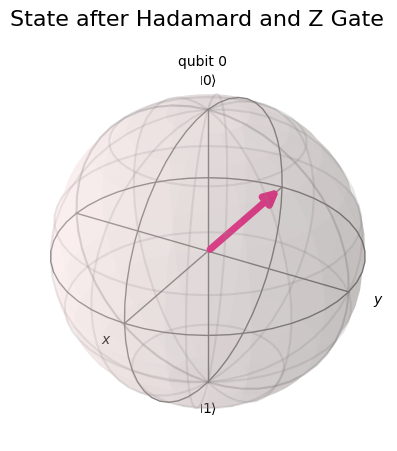

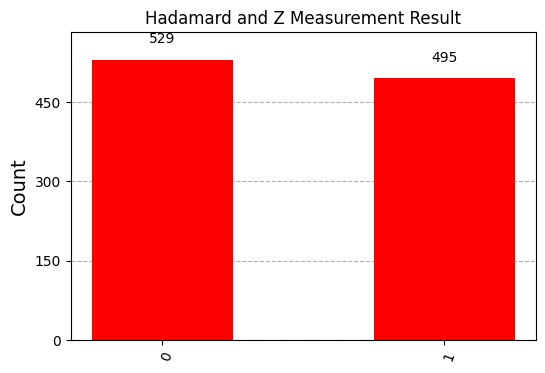

In [64]:
qc_hz = QuantumCircuit(1,1)
qc_hz.h(0)  # Apply Hadamard gate
qc_hz.z(0)  # Apply Z gate

state = Statevector(qc_hz)

# Measure the qubit and store the result in the classical bit
qc_hz.measure(0,0)

# Plot the Bloch sphere representation of the state after applying Hadamard and Z gate
plot_bloch_multivector(state, title='State after Hadamard and Z Gate')

# Select the qasm simulator backend
simulator = Aer.get_backend('qasm_simulator')
# Transpile the circuit for the simulator
complied_circuit = transpile(qc_hz, simulator)
# Execute the circuit on the qasm simulator
result = simulator.run(complied_circuit, shot=1024).result()
# Get the counts
counts = result.get_counts(qc_hz)
# Plot the results with a histogram
plot_histogram(counts, color=['red'],  # special colors
               title='Hadamard and Z Measurement Result',
               figsize=(6,4),
               filename='images/hadamard_z_histogram.svg')  # export to SVG
# Show the plot
plt.show()


After Hadamard and Z gate are applied, the qubit state is:
$$ 
|-⟩ = \frac{1}{\sqrt{2}}(|0⟩ - |1⟩)
$$

## Hadamard and X Gate

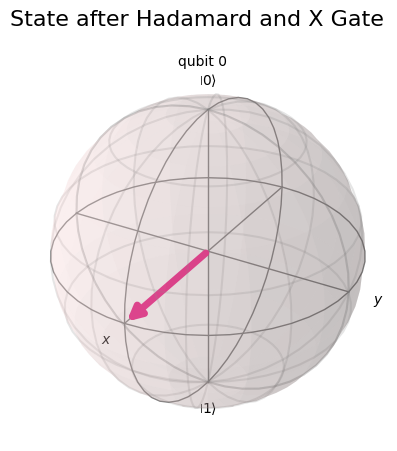

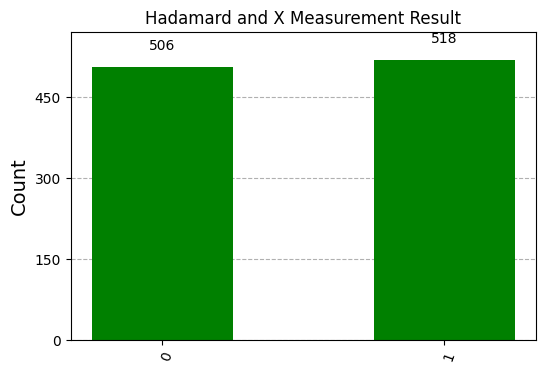

In [65]:
qc_hx = QuantumCircuit(1,1)
qc_hx.h(0)  # Apply Hadamard gate: |0> -> |+>
qc_hx.x(0)  # Apply X gate: |+> -> |->

state = Statevector(qc_hx)
# Measure the qubit and store the result in the classical bit
qc_hx.measure(0,0)

# Plot the Bloch sphere representation of the state after applying Hadamard and X gate
plot_bloch_multivector(state, title='State after Hadamard and X Gate')

# Select the qasm simulator backend
simulator = Aer.get_backend('qasm_simulator')
# Transpile the circuit for the simulator
complied_circuit = transpile(qc_hx, simulator)
# Execute the circuit on the qasm simulator
result = simulator.run(complied_circuit, shot=1024).result()
# Get the counts
counts = result.get_counts(qc_hx)
# Plot the results with a histogram
plot_histogram(counts, color=['green'],  # special colors
               title='Hadamard and X Measurement Result',
               figsize=(6,4),
               filename='images/hadamard_x_histogram.svg')  # export to SVG
# Show the plot
plt.show()

